In [1]:
import pandas as pd
import numpy as np

In [2]:
game = pd.read_csv('games_sales.csv')

In [3]:
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


In [4]:
game.loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

NA_Sales       1173.30
EU_Sales        793.64
JP_Sales        107.06
Other_Sales     282.75
dtype: float64

In [5]:
game.loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

NA_Sales       0.373306
EU_Sales       0.252510
JP_Sales       0.034063
Other_Sales    0.089962
dtype: float64

In [6]:
game.loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].max(axis = 1)

0       14.97
1        9.27
2        9.63
3        9.03
4        9.67
        ...  
3138     0.01
3139     0.01
3140     0.01
3141     0.01
3142     0.01
Length: 3143, dtype: float64

In [7]:
sales = game.loc[:, ['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [8]:
sales.groupby('Platform').max()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
PS3,7.01,9.27,1.87,4.14
PS4,5.77,6.06,0.48,2.31
X360,14.97,5.31,0.24,1.67
XOne,4.52,2.11,0.04,0.67


In [9]:
platform_name = {
    'PS3': 'PlayStation',
    'PS4': 'PlayStation',
    'X360': 'XBox',
    'XOne': 'XBox'
}

In [10]:
sales.set_index('Platform').groupby(platform_name).sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
PlayStation,489.06,467.41,94.29,185.29
XBox,684.24,326.23,12.77,97.46


In [11]:
publishers = game.loc[:, ['Publisher', 'Genre', 'Platform', 'NA_Sales']]
publishers

,Publisher,Genre,Platform,NA_Sales
0,Microsoft Game Studios,Misc,X360,14.97
1,Take-Two Interactive,Action,PS3,7.01
2,Take-Two Interactive,Action,X360,9.63
3,Activision,Shooter,X360,9.03
4,Activision,Shooter,X360,9.67
...,...,...,...,...
3138,NaN,Role-Playing,X360,0.00
3139,Deep Silver,Platform,XOne,0.01
3140,Capcom,Shooter,XOne,0.01
3141,UIG Entertainment,Simulation,PS4,0.00


In [12]:
publishers.groupby('Publisher').sum().sort_values(by = 'NA_Sales', ascending=False).head(10)

,NA_Sales
Publisher,
Electronic Arts,213.38
Activision,193.16
Take-Two Interactive,120.99
Microsoft Game Studios,116.77
Ubisoft,98.65
Sony Computer Entertainment,76.35
Warner Bros. Interactive Entertainment,45.24
THQ,36.44
Bethesda Softworks,33.88


In [13]:
publishers.groupby('Platform').sum().sort_values(by='NA_Sales', ascending=False)

,NA_Sales
Platform,
X360,601.05
PS3,392.26
PS4,96.80
XOne,83.19


In [14]:
sales.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,X360,14.97,4.94,0.24,1.67
1,PS3,7.01,9.27,0.97,4.14
2,X360,9.63,5.31,0.06,1.38
3,X360,9.03,4.28,0.13,1.32
4,X360,9.67,3.73,0.11,1.13


In [15]:
sales.groupby('Platform').get_group('PS3')

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,PS3,7.01,9.27,0.97,4.14
6,PS3,4.99,5.88,0.65,2.52
9,PS3,5.54,5.82,0.49,1.62
10,PS3,5.98,4.44,0.48,1.83
14,PS3,2.96,4.88,0.81,2.12
...,...,...,...,...,...
3124,PS3,0.00,0.01,0.00,0.00
3125,PS3,0.00,0.00,0.01,0.00
3129,PS3,0.00,0.00,0.01,0.00
3132,PS3,0.00,0.00,0.01,0.00


In [16]:
game.groupby(['Publisher', 'Genre']).sum()

Year  NA_Sales  EU_Sales  JP_Sales  \
Publisher         Genre                                               
49Games           Sports       2009.0      0.00      0.04      0.00   
505 Games         Action      16098.0      0.84      1.05      0.10   
                  Adventure    4030.0      0.06      0.09      0.00   
                  Fighting    10049.0      0.28      0.09      0.02   
                  Misc        14078.0      0.56      0.16      0.00   
...                               ...       ...       ...       ...   
Yeti              Fighting     2016.0      0.00      0.00      0.02   
Zoo Games         Misc         2011.0      0.30      0.00      0.00   
Zushi Games       Racing       2009.0      0.02      0.00      0.00   
                  Sports       2009.0      0.18      0.01      0.00   
bitComposer Games Simulation   4022.0      0.16      0.08      0.00   

                              Other_Sales  Global_Sales  
Publisher         Genre                                  
49Games           Sports             0.00          0.04  
505 Games         Action             0.26          2.25  
                  Adventure          0.02          0.17  
                  Fighting           0.05          0.44  
                  Misc               0.06          0.80  
...                                   ...           ...  
Yeti              Fighting           0.00          0.02  
Zoo Games         Misc               0.02          0.32  
Zushi Games       Racing             0.00          0.02  
                  Sports             0.01          0.21  
bitComposer Games Simulation         0.04          0.27  

[422 rows x 6 columns]

In [17]:
sales.groupby(['Platform']).agg(['sum', 'count', 'std', 'mean']).columns

MultiIndex([(   'NA_Sales',   'sum'),
            (   'NA_Sales', 'count'),
            (   'NA_Sales',   'std'),
            (   'NA_Sales',  'mean'),
            (   'EU_Sales',   'sum'),
            (   'EU_Sales', 'count'),
            (   'EU_Sales',   'std'),
            (   'EU_Sales',  'mean'),
            (   'JP_Sales',   'sum'),
            (   'JP_Sales', 'count'),
            (   'JP_Sales',   'std'),
            (   'JP_Sales',  'mean'),
            ('Other_Sales',   'sum'),
            ('Other_Sales', 'count'),
            ('Other_Sales',   'std'),
            ('Other_Sales',  'mean')],
           )

In [18]:
sales.groupby(['Platform']).agg(['sum', 'count', 'std', 'mean']).sort_values(by=('JP_Sales', 'mean'))

NA_Sales                           EU_Sales                  \
              sum count       std      mean      sum count       std   
Platform                                                               
XOne        83.19   213  0.641796  0.390563    45.65   213  0.358040   
X360       601.05  1265  1.031488  0.475138   280.58  1265  0.483546   
PS4         96.80   336  0.594151  0.288095   123.70   336  0.796806   
PS3        392.26  1329  0.578325  0.295154   343.71  1329  0.601182   

                   JP_Sales                           Other_Sales        \
              mean      sum count       std      mean         sum count   
Platform                                                                  
XOne      0.214319     0.34   213  0.005519  0.001596       11.92   213   
X360      0.221802    12.43  1265  0.024594  0.009826       85.54  1265   
PS4       0.368155    14.30   336  0.070571  0.042560       43.36   336   
PS3       0.258623    79.99  1329  0.131329  0.060188      141.93  1329   

                              
               std      mean  
Platform                      
XOne      0.089230  0.055962  
X360      0.141638  0.067621  
PS4       0.268794  0.129048  
PS3       0.241682  0.106795

In [19]:
sales.groupby(['Platform']).agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'mean'
})

,NA_Sales,EU_Sales
Platform,,
PS3,392.26,0.258623
PS4,96.80,0.368155
X360,601.05,0.221802
XOne,83.19,0.214319


In [20]:
sales.groupby('Platform').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
PS3,392.26,343.71,79.99,141.93
PS4,96.80,123.70,14.30,43.36
X360,601.05,280.58,12.43,85.54
XOne,83.19,45.65,0.34,11.92


In [21]:
sales.groupby('Platform').sum().transform(lambda sale: print(sale.PS3) )

392.2599999999998
343.70999999999805
79.99000000000005
141.92999999999992


NA_Sales       None
EU_Sales       None
JP_Sales       None
Other_Sales    None
dtype: object

In [22]:
sales.groupby('Platform').filter(lambda sale: sale['NA_Sales'].mean() > 0.4)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,X360,14.97,4.94,0.24,1.67
2,X360,9.63,5.31,0.06,1.38
3,X360,9.03,4.28,0.13,1.32
4,X360,9.67,3.73,0.11,1.13
7,X360,8.25,4.30,0.07,1.12
...,...,...,...,...,...
3127,X360,0.00,0.01,0.00,0.00
3128,X360,0.00,0.00,0.01,0.00
3130,X360,0.01,0.00,0.00,0.00
3135,X360,0.00,0.00,0.01,0.00


In [23]:
sales.groupby('Platform').get_group('PS3')

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,PS3,7.01,9.27,0.97,4.14
6,PS3,4.99,5.88,0.65,2.52
9,PS3,5.54,5.82,0.49,1.62
10,PS3,5.98,4.44,0.48,1.83
14,PS3,2.96,4.88,0.81,2.12
...,...,...,...,...,...
3124,PS3,0.00,0.01,0.00,0.00
3125,PS3,0.00,0.00,0.01,0.00
3129,PS3,0.00,0.00,0.01,0.00
3132,PS3,0.00,0.00,0.01,0.00


In [24]:
sales.groupby('Platform').transform(lambda x: x+10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,24.97,14.94,10.24,11.67
1,17.01,19.27,10.97,14.14
2,19.63,15.31,10.06,11.38
3,19.03,14.28,10.13,11.32
4,19.67,13.73,10.11,11.13
...,...,...,...,...
3138,10.00,10.01,10.00,10.00
3139,10.01,10.00,10.00,10.00
3140,10.01,10.00,10.00,10.00
3141,10.00,10.01,10.00,10.00


Platform
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
PS4     AxesSubplot(0.125,0.125;0.775x0.755)
X360    AxesSubplot(0.125,0.125;0.775x0.755)
XOne    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

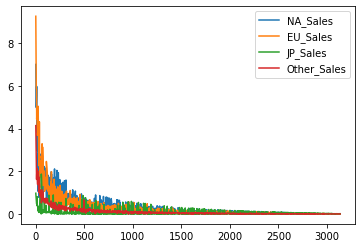

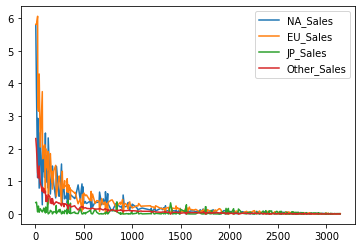

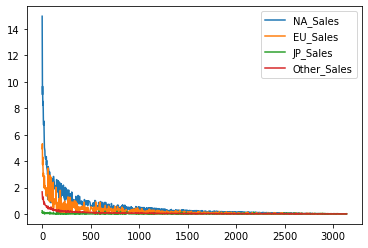

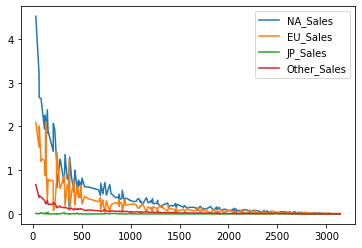

In [25]:
sales.groupby('Platform').plot()